# Non-Linear Function Approximation (Oefenopdracht 3)

## 1. Generate Data
Including noise this time

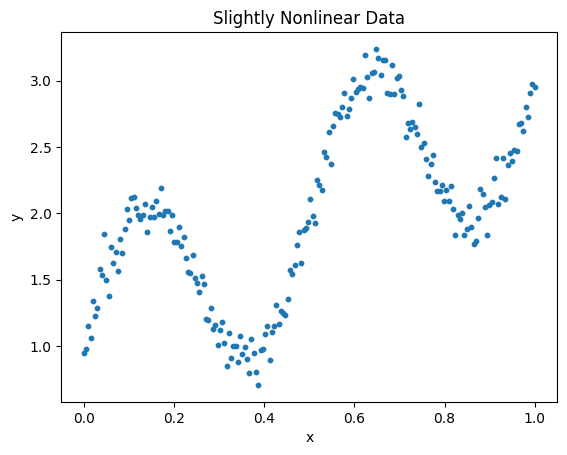

In [24]:
import numpy as np
import matplotlib.pyplot as plt

xdat = np.linspace(0, 1, 200).reshape(-1, 1)
ydat = 2 * xdat + 1 + 0.8 * np.sin(4 * np.pi * xdat) + np.random.normal(scale=0.1, size=xdat.shape)

plt.scatter(xdat, ydat, s=10)
plt.title("Slightly Nonlinear Data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


## 2. Baseline Model

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np


In [26]:
# Convert data to PyTorch tensors
x = torch.from_numpy(xdat).float()
y = torch.from_numpy(ydat).float()


# Basic model without hidden layers. Hidden layers aren't necessary since the data follows a straight line, 
# meaning it can be solved with linear regression
class LinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.output = nn.Linear(1, 1)  # input -> output directly

    def forward(self, x):
        return self.output(x)

model = LinearModel()

# Loss Function
criterion_MSE = nn.MSELoss()
criterion_MAE = nn.L1Loss()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)  # similar to Keras adam



## 3. Train Model

In [18]:
epochs = 5000
n_epoch = 5000
for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = criterion_MSE(y_pred, y)
    loss.backward()
    optimizer.step()

    if loss.item() < 0.00005:
        n_epoch = epoch
        break

print(f"Final loss: {loss.item():.4f}, Total epochs: {n_epoch}")


Final loss: 0.2877, Total epochs: 5000


## 4. Predictions   

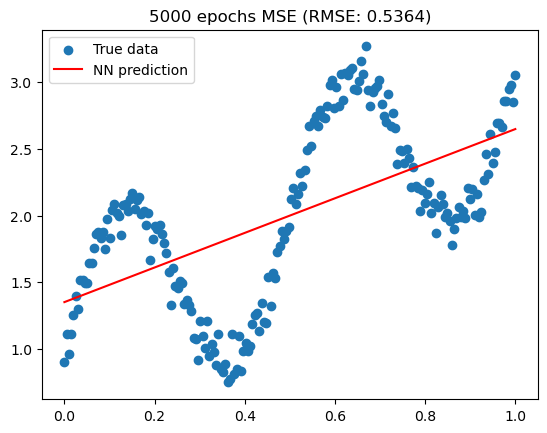

In [19]:
import math
xplot = torch.from_numpy(np.linspace(0, 1, 100).reshape(-1, 1).astype(np.float32))
ypred = model(xplot).detach().numpy()

plt.scatter(xdat, ydat, label="True data")
plt.plot(np.linspace(0,1,100), ypred, 'r', label="NN prediction")
plt.title(f"5000 epochs MSE (RMSE: {math.sqrt(loss.item()):.4f})")
plt.legend()
plt.show()

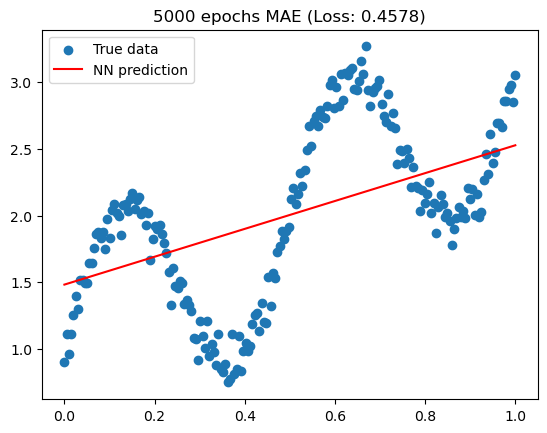

In [16]:
xplot = torch.from_numpy(np.linspace(0, 1, 100).reshape(-1, 1).astype(np.float32))
ypred = model(xplot).detach().numpy()

plt.scatter(xdat, ydat, label="True data")
plt.plot(np.linspace(0,1,100), ypred, 'r', label="NN prediction")
plt.title(f"5000 epochs MAE (Loss: {loss.item():.4f})")
plt.legend()
plt.show()

## 5. Interlude
Linear Regression cannot capture the exact shape of the data, since the data isn't a straight line. For that reason I am going to use a small neural network. I will try to keep the network as simple as possible because I am curious what the bare minimum is for neurons and hidden layers to create a model that can fit exactly over the data shape.

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim

# Smallest NN: 1 hidden layer, 1 neuron
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(1, 1)  # 1 input -> 1 hidden neuron
        self.activation = nn.Tanh()    # Nonlinear activation
        self.output = nn.Linear(1, 1)  # 1 hidden -> 1 output

    def forward(self, x):
        x = self.activation(self.hidden(x))
        x = self.output(x)
        return x

# Instantiate the model
model = SimpleNN()

# Example loss and optimizer
criterion = nn.MSELoss() # chosen MSE because the data has a clear shape without any big outliers.
optimizer = optim.Adam(model.parameters(), lr=0.01)


Epoch 500/5000, Loss: 0.2917
Epoch 1000/5000, Loss: 0.2856
Epoch 1500/5000, Loss: 0.2841
Epoch 2000/5000, Loss: 0.2833
Epoch 2500/5000, Loss: 0.2821
Epoch 3000/5000, Loss: 0.2774
Epoch 3500/5000, Loss: 0.2249
Epoch 4000/5000, Loss: 0.1882
Epoch 4500/5000, Loss: 0.1746
Epoch 5000/5000, Loss: 0.1678


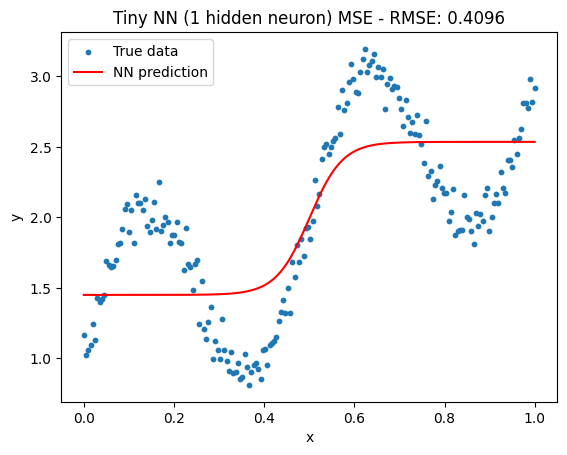

In [11]:
# --- Training loop ---
epochs = 5000
for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 500 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# --- Plot predictions ---
with torch.no_grad():
    xplot = torch.from_numpy(np.linspace(0,1,200).reshape(-1,1).astype(np.float32))
    ypred = model(xplot).detach().numpy()
    rmse = torch.sqrt(criterion(model(x), y)).item()

plt.scatter(xdat, ydat, s=10, label="True data")
plt.plot(np.linspace(0,1,200), ypred, 'r', label="NN prediction")
plt.title(f"Tiny NN (1 hidden neuron) MSE - RMSE: {rmse:.4f}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Epoch 500/10000, Loss: 0.2854
Epoch 1000/10000, Loss: 0.2819
Epoch 1500/10000, Loss: 0.2738
Epoch 2000/10000, Loss: 0.1962
Epoch 2500/10000, Loss: 0.0945
Epoch 3000/10000, Loss: 0.0755
Epoch 3500/10000, Loss: 0.0726
Epoch 4000/10000, Loss: 0.0721
Epoch 4500/10000, Loss: 0.0718
Epoch 5000/10000, Loss: 0.0715
Epoch 5500/10000, Loss: 0.0713
Epoch 6000/10000, Loss: 0.0711
Epoch 6500/10000, Loss: 0.0708
Epoch 7000/10000, Loss: 0.0707
Epoch 7500/10000, Loss: 0.0705
Epoch 8000/10000, Loss: 0.0704
Epoch 8500/10000, Loss: 0.0702
Epoch 9000/10000, Loss: 0.0701
Epoch 9500/10000, Loss: 0.0700
Epoch 10000/10000, Loss: 0.0699


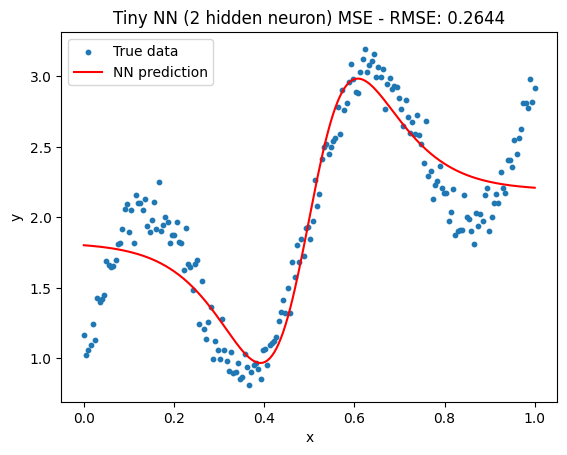

In [15]:
import torch
import torch.nn as nn

class MultiCurveNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(1, 2)  # 2 neurons → can create 2 S-bends
        self.activation = nn.Tanh()
        self.output = nn.Linear(2, 1)  # combine the 2 neurons into final output

    def forward(self, x):
        x = self.activation(self.hidden(x))
        x = self.output(x)
        return x

# Instantiate the model
model = MultiCurveNN()

# Example loss and optimizer
criterion = nn.MSELoss() # chosen MSE because the data has a clear shape without any big outliers.
optimizer = optim.Adam(model.parameters(), lr=0.01)





# --- Training loop ---
epochs = 10000
for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 500 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# --- Plot predictions ---
with torch.no_grad():
    xplot = torch.from_numpy(np.linspace(0,1,200).reshape(-1,1).astype(np.float32))
    ypred = model(xplot).detach().numpy()
    rmse = torch.sqrt(criterion(model(x), y)).item()

plt.scatter(xdat, ydat, s=10, label="True data")
plt.plot(np.linspace(0,1,200), ypred, 'r', label="NN prediction")
plt.title(f"Tiny NN (2 hidden neuron) MSE - RMSE: {rmse:.4f}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


Epoch 500/10000, Loss: 0.2859
Epoch 1000/10000, Loss: 0.2844
Epoch 1500/10000, Loss: 0.2815
Epoch 2000/10000, Loss: 0.2592
Epoch 2500/10000, Loss: 0.1372
Epoch 3000/10000, Loss: 0.0902
Epoch 3500/10000, Loss: 0.0760
Epoch 4000/10000, Loss: 0.0727
Epoch 4500/10000, Loss: 0.0703
Epoch 5000/10000, Loss: 0.0599
Epoch 5500/10000, Loss: 0.0505
Epoch 6000/10000, Loss: 0.0462
Epoch 6500/10000, Loss: 0.0450
Epoch 7000/10000, Loss: 0.0443
Epoch 7500/10000, Loss: 0.0439
Epoch 8000/10000, Loss: 0.0436
Epoch 8500/10000, Loss: 0.0433
Epoch 9000/10000, Loss: 0.0432
Epoch 9500/10000, Loss: 0.0431
Epoch 10000/10000, Loss: 0.0430


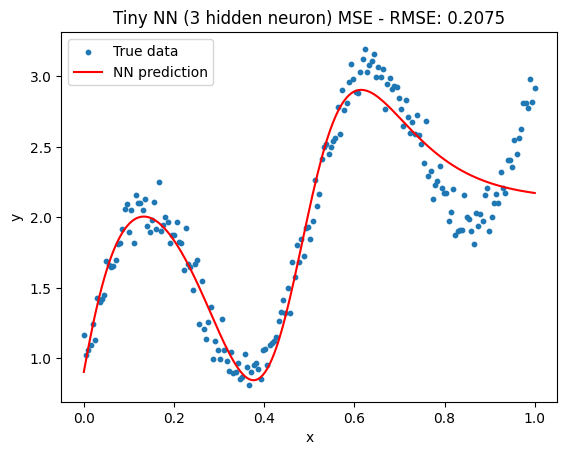

In [17]:
import torch
import torch.nn as nn

class MultiCurveNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(1, 3)  # 2 neurons → can create 2 S-bends
        self.activation = nn.Tanh()
        self.output = nn.Linear(3, 1)  # combine the 2 neurons into final output

    def forward(self, x):
        x = self.activation(self.hidden(x))
        x = self.output(x)
        return x

# Instantiate the model
model = MultiCurveNN()

# Example loss and optimizer
criterion = nn.MSELoss() # chosen MSE because the data has a clear shape without any big outliers.
optimizer = optim.Adam(model.parameters(), lr=0.01)





# --- Training loop ---
epochs = 10000
for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 500 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# --- Plot predictions ---
with torch.no_grad():
    xplot = torch.from_numpy(np.linspace(0,1,200).reshape(-1,1).astype(np.float32))
    ypred = model(xplot).detach().numpy()
    rmse = torch.sqrt(criterion(model(x), y)).item()

plt.scatter(xdat, ydat, s=10, label="True data")
plt.plot(np.linspace(0,1,200), ypred, 'r', label="NN prediction")
plt.title(f"Tiny NN (3 hidden neuron) MSE - RMSE: {rmse:.4f}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


Epoch 500/10000, Loss: 0.2914
Epoch 1000/10000, Loss: 0.2885
Epoch 1500/10000, Loss: 0.2751
Epoch 2000/10000, Loss: 0.1342
Epoch 2500/10000, Loss: 0.0972
Epoch 3000/10000, Loss: 0.0789
Epoch 3500/10000, Loss: 0.0660
Epoch 4000/10000, Loss: 0.0518
Epoch 4500/10000, Loss: 0.0436
Epoch 5000/10000, Loss: 0.0413
Epoch 5500/10000, Loss: 0.0395
Epoch 6000/10000, Loss: 0.0356
Epoch 6500/10000, Loss: 0.0221
Epoch 7000/10000, Loss: 0.0173
Epoch 7500/10000, Loss: 0.0148
Epoch 8000/10000, Loss: 0.0134
Epoch 8500/10000, Loss: 0.0128
Epoch 9000/10000, Loss: 0.0124
Epoch 9500/10000, Loss: 0.0121
Epoch 10000/10000, Loss: 0.0118


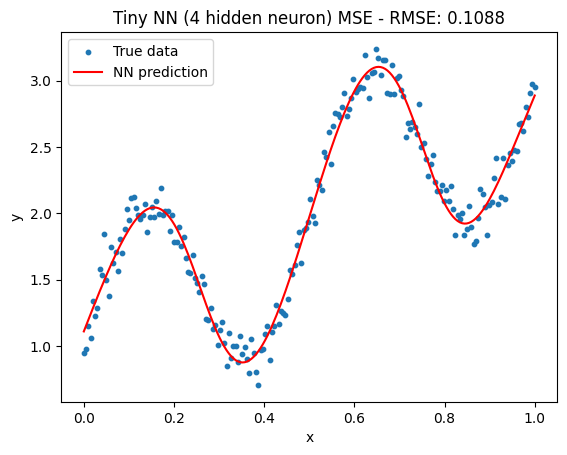

In [27]:
import torch
import torch.nn as nn

class MultiCurveNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(1, 4)  # 2 neurons → can create 2 S-bends
        self.activation = nn.Tanh()
        self.output = nn.Linear(4, 1)  # combine the 2 neurons into final output

    def forward(self, x):
        x = self.activation(self.hidden(x))
        x = self.output(x)
        return x

# Instantiate the model
model = MultiCurveNN()

# Example loss and optimizer
criterion = nn.MSELoss() # chosen MSE because the data has a clear shape without any big outliers.
optimizer = optim.Adam(model.parameters(), lr=0.01)





# --- Training loop ---
epochs = 10000
for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 500 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# --- Plot predictions ---
with torch.no_grad():
    xplot = torch.from_numpy(np.linspace(0,1,200).reshape(-1,1).astype(np.float32))
    ypred = model(xplot).detach().numpy()
    rmse = torch.sqrt(criterion(model(x), y)).item()

plt.scatter(xdat, ydat, s=10, label="True data")
plt.plot(np.linspace(0,1,200), ypred, 'r', label="NN prediction")
plt.title(f"Tiny NN (4 hidden neuron) MSE - RMSE: {rmse:.4f}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


Epoch 500/10000, Loss: 0.2870
Epoch 1000/10000, Loss: 0.2786
Epoch 1500/10000, Loss: 0.2242
Epoch 2000/10000, Loss: 0.1290
Epoch 2500/10000, Loss: 0.0952
Epoch 3000/10000, Loss: 0.0714
Epoch 3500/10000, Loss: 0.0529
Epoch 4000/10000, Loss: 0.0424
Epoch 4500/10000, Loss: 0.0319
Epoch 5000/10000, Loss: 0.0196
Epoch 5500/10000, Loss: 0.0129
Epoch 6000/10000, Loss: 0.0109
Epoch 6500/10000, Loss: 0.0105
Epoch 7000/10000, Loss: 0.0104
Epoch 7500/10000, Loss: 0.0104
Epoch 8000/10000, Loss: 0.0104
Epoch 8500/10000, Loss: 0.0104
Epoch 9000/10000, Loss: 0.0104
Epoch 9500/10000, Loss: 0.0104
Epoch 10000/10000, Loss: 0.0104


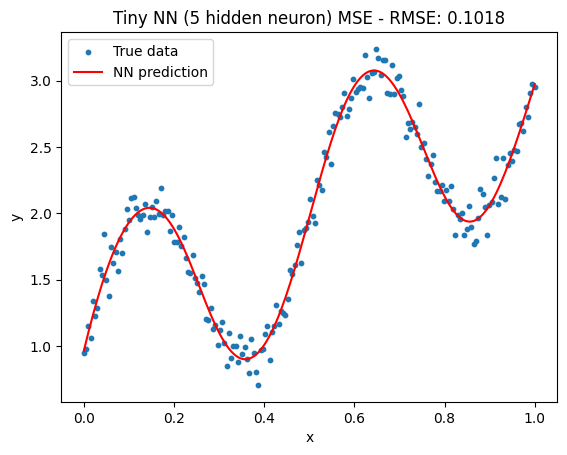

In [28]:
import torch
import torch.nn as nn

class MultiCurveNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(1, 5)  # 2 neurons → can create 2 S-bends
        self.activation = nn.Tanh()
        self.output = nn.Linear(5, 1)  # combine the 2 neurons into final output

    def forward(self, x):
        x = self.activation(self.hidden(x))
        x = self.output(x)
        return x

# Instantiate the model
model = MultiCurveNN()

# Example loss and optimizer
criterion = nn.MSELoss() # chosen MSE because the data has a clear shape without any big outliers.
optimizer = optim.Adam(model.parameters(), lr=0.01)





# --- Training loop ---
epochs = 10000
for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 500 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# --- Plot predictions ---
with torch.no_grad():
    xplot = torch.from_numpy(np.linspace(0,1,200).reshape(-1,1).astype(np.float32))
    ypred = model(xplot).detach().numpy()
    rmse = torch.sqrt(criterion(model(x), y)).item()

plt.scatter(xdat, ydat, s=10, label="True data")
plt.plot(np.linspace(0,1,200), ypred, 'r', label="NN prediction")
plt.title(f"Tiny NN (5 hidden neuron) MSE - RMSE: {rmse:.4f}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


Epoch 500/10000, Loss: 0.2910
Epoch 1000/10000, Loss: 0.2889
Epoch 1500/10000, Loss: 0.2855
Epoch 2000/10000, Loss: 0.2389
Epoch 2500/10000, Loss: 0.1043
Epoch 3000/10000, Loss: 0.0733
Epoch 3500/10000, Loss: 0.0644
Epoch 4000/10000, Loss: 0.0579
Epoch 4500/10000, Loss: 0.0525
Epoch 5000/10000, Loss: 0.0471
Epoch 5500/10000, Loss: 0.0399
Epoch 6000/10000, Loss: 0.0303
Epoch 6500/10000, Loss: 0.0212
Epoch 7000/10000, Loss: 0.0163
Epoch 7500/10000, Loss: 0.0142
Epoch 8000/10000, Loss: 0.0132
Epoch 8500/10000, Loss: 0.0127
Epoch 9000/10000, Loss: 0.0123
Epoch 9500/10000, Loss: 0.0124
Epoch 10000/10000, Loss: 0.0119


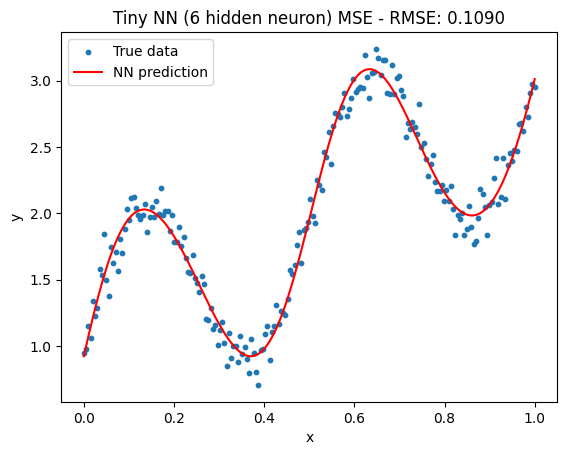

In [29]:
import torch
import torch.nn as nn

class MultiCurveNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(1, 6)  # 2 neurons → can create 2 S-bends
        self.activation = nn.Tanh()
        self.output = nn.Linear(6, 1)  # combine the 2 neurons into final output

    def forward(self, x):
        x = self.activation(self.hidden(x))
        x = self.output(x)
        return x

# Instantiate the model
model = MultiCurveNN()

# Example loss and optimizer
criterion = nn.MSELoss() # chosen MSE because the data has a clear shape without any big outliers.
optimizer = optim.Adam(model.parameters(), lr=0.01)





# --- Training loop ---
epochs = 10000
for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 500 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# --- Plot predictions ---
with torch.no_grad():
    xplot = torch.from_numpy(np.linspace(0,1,200).reshape(-1,1).astype(np.float32))
    ypred = model(xplot).detach().numpy()
    rmse = torch.sqrt(criterion(model(x), y)).item()

plt.scatter(xdat, ydat, s=10, label="True data")
plt.plot(np.linspace(0,1,200), ypred, 'r', label="NN prediction")
plt.title(f"Tiny NN (6 hidden neuron) MSE - RMSE: {rmse:.4f}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


## 6. Conclusion
We need 4 neurons since there are 4 bends in the data shape. Any additional neuron would be unneccessary in this given data shape, since it can be solved with only 4 neurons. Also, I can conclude that foreach added neuron, the model can learn to add a new curve to its path. Looking back at the data shape we are dealing with, we have a total of 4 curves, therefore 4 neurons is enough.